In [1]:
#  Ebnable HTML/CSS 
from IPython.core.display import HTML
HTML("<link href='https://fonts.googleapis.com/css?family=Passion+One' rel='stylesheet' type='text/css'><style>div.attn { font-family: 'Helvetica Neue'; font-size: 30px; line-height: 40px; color: #FFFFFF; text-align: center; margin: 30px 0; border-width: 10px 0; border-style: solid; border-color: #5AAAAA; padding: 30px 0; background-color: #DDDDFF; }hr { border: 0; background-color: #ffffff; border-top: 1px solid black; }hr.major { border-top: 10px solid #5AAA5A; }hr.minor { border: none; background-color: #ffffff; border-top: 5px dotted #CC3333; }div.bubble { width: 65%; padding: 20px; background: #DDDDDD; border-radius: 15px; margin: 0 auto; font-style: italic; color: #f00; }em { color: #AAA; }div.c1{visibility:hidden;margin:0;height:0;}div.note{color:red;}</style>")

___
Enter Team Member Names here (*double click to edit*):

- Name 1: Jingzhen Hu
- Name 2: Yichen Duan
- Name 3: Chuhan JIn

___

# In Class Assignment Three
In the following assignment you will be asked to fill in python code and derivations for a number of different problems. Please read all instructions carefully and turn in the rendered notebook (or HTML of the rendered notebook)  before the end of class (or right after class). The initial portion of this notebook is given before class and the remainder is given during class. Please answer the initial questions before class, to the best of your ability. Once class has started you may rework your answers as a team for the initial part of the assignment. 

<a id="top"></a>
## Contents
* <a href="#LoadingKDD">Loading KDDCup Data</a>
* <a href="#kdd_eval">KDDCup Evaluation and Cross Validation</a>
* <a href="#data_snooping">More Cross Validation</a>
* <a href="#stats">Statistical Comparison</a>

**Before coming to class**, please make sure you have the latest version of `scikit-learn`. This notebook was created for version 0.18 and higher. 

________________________________________________________________________________________________________

<a id="LoadingKDD"></a>
<a href="#top">Back to Top</a>
## Loading KDDCup Data

Please run the following code to read in the "KDD Cup" dataset from sklearn's data loading module. It consists of examples of different simulated attacks for the 1998 DARPA Intrusion Detection System (IDS). 

This will load the data into the variable `ds`. `ds` is a `bunch` object with fields like `ds.data` and `ds.target`. The field `ds.data` is a numpy matrix of the continuous features in the dataset. **The object is not a pandas dataframe. It is a numpy matrix.** Each row is a set of observed instances, each column is a different feature. It also has a field called `ds.target` that is an integer value we are trying to predict (i.e., a specific integer represents a specific person). Each entry in `ds.target` is a label for each row of the `ds.data` matrix. 

In [2]:
# fetch the dataset
from sklearn.datasets import  fetch_kddcup99
from sklearn import __version__ as sklearn_version

print('Sklearn Version:',sklearn_version)
ds =  fetch_kddcup99(subset='http')

Sklearn Version: 0.18.1


In [3]:
import numpy as np
# get some of the specifics of the dataset
X = ds.data
y = ds.target != b'normal.'

n_samples, n_features = X.shape
n_classes = len(np.unique(y))

print("n_samples: {}".format(n_samples))
print("n_features: {}".format(n_features))
print("n_classes: {}".format(n_classes))

n_samples: 58725
n_features: 3
n_classes: 2


___
**Question 1:** How many instances are in the binary classification problem loaded above? How many instances are in each class? **Plot a pie chart or bar chart of the number of classes.**

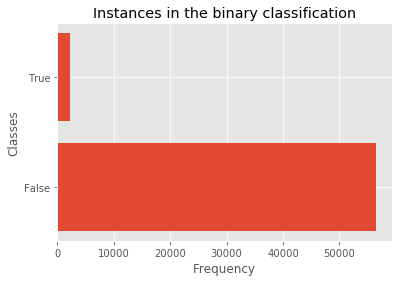

Number of instances in each class: False -  56516 ; True -  2209


In [7]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

#=== Fill in code below========
pos = np.arange(2)+0.5 #classes = [0,1]
record_False = 0
for ele in y:
    if ele == False:
        record_False = record_False + 1
frequency = [record_False,len(y)-record_False]
plt.barh(pos,frequency, align='center')
plt.title('Instances in the binary classification')
plt.xlabel('Frequency')
plt.ylabel('Classes')
plt.yticks(pos,['False','True'])
plt.show()

# class_counts = np.bincount(y)
# plt.pie(class_counts)
# print(class_counts)

print('Number of instances in each class:', 'False - ', frequency[0], '; True - ', frequency[1])



<a id="kdd_eval"></a>
<a href="#top">Back to Top</a>
## KDDCup Evaluation and Cross Validation

(0.9888079019073569, 1.0)

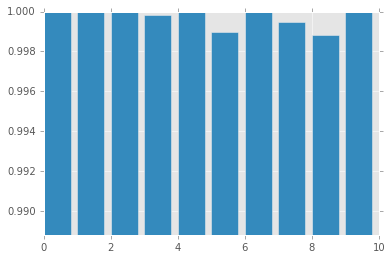

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, ShuffleSplit
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit

from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression

# select model
clf = LogisticRegression()
#select cross validation
cv = KFold(n_splits=10)
# select evaluation criteria
my_scorer = make_scorer(accuracy_score)
# run model training and cross validation
per_fold_eval_criteria = cross_val_score(estimator=clf,
                                    X=X,
                                    y=y,
                                    cv=cv,
                                    scoring=my_scorer
                                   )
plt.bar(range(len(per_fold_eval_criteria)),per_fold_eval_criteria)
plt.ylim([min(per_fold_eval_criteria)-0.01,max(per_fold_eval_criteria)])

____
**Question 2** Is the code above a proper separation of training and testing sets for the given dataset? Why or why not?



*Enter you answer here (double click)*

*Yes or No and why*

No, as our case involve an extremely class imbalanced situation which the normal cross validation will be possible to lead to a fold conatins all the Flase class instances (size of False class is far more than the True class) and no Trye class instances. Thus, we need to use the straified cross validation (partition with fixed proportion). Also, nested cross validation is recommanded to be applied to in case the "data snooping".
___

**Question 3:** Is the evaluation metric chosen in the above code appropriate for the dataset? Why or Why not?

*Enter you answer here (double click)*

*Yes or No and why* 

No, as the standard for evaluating in the code above use the accuracy function but the limitation of accuracy ignores the cost of missclassification. As in our case, there is a extreme imblanaced classifiers problem. Even if we misclassified all the instances in the fewer class (True class here), which only have 2209. Comparing to the total number of instances in the dataset, the accuaracy could be still very high like (56516/58725 = 96.24%). Thus, we need to search for other better evaluation method.

___

**Exercise 1:** If the code above is not a proper separation of the train or does not use the proper evaluation criteria, fix the code in the block below to use appropriate train/test separation and appropriate evaluation criterion (criteria). 

(0.97876404494382019, 1.0)

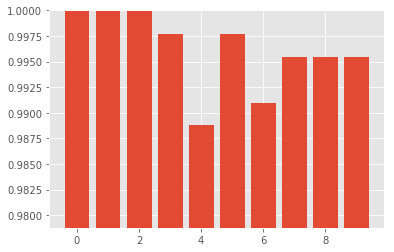

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, ShuffleSplit
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit

from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
# these imports above might help you

#=====Write your code below here=================
# select model
clf = LogisticRegression()
#select cross validation
cv = StratifiedShuffleSplit(n_splits=10)
# select evaluation criteria
my_scorer = make_scorer(f1_score)
# run model training and cross validation
per_fold_eval_criteria = cross_val_score(estimator=clf,
                                    X=X,
                                    y=y,
                                    cv=cv,
                                    scoring=my_scorer
                                   )

plt.bar(range(len(per_fold_eval_criteria)),per_fold_eval_criteria)
plt.ylim([min(per_fold_eval_criteria)-0.01,max(per_fold_eval_criteria)])

____
**Question 4**: Does the learning algorithm perform well based on the evaluation criteria? Why or why not?


*Enter you answer here (double click)*

Yes, the score returned back is in the range of (97.8%, 100%) which gives a pretty good performance but we also need to consider there is any 'data snooping' involved in the process. For real live, we need to consider how the learning algorithm works on the data it has not seen before to make plausible.
 


___


<a id="data_snooping"></a>
<a href="#top">Back to Top</a>

## More Cross Validation

**Exercise 2:** Does the code below contain any errors in the implementation of the cross validation? If so, fix the code below.  

(0.89308370044052876, 0.9606986899563319)

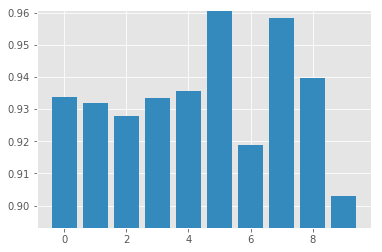

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


#======If there are errors, fix them below======
n_components = 1
pca = PCA(n_components=n_components)
Xpca = pca.fit_transform(X)

clf = Pipeline([('scl',StandardScaler()),
                ('clf',LogisticRegression())])

per_fold_eval_criteria = cross_val_score(estimator=clf,
                                    X=Xpca,
                                    y=y,
                                    cv=cv,
                                    scoring=my_scorer
                                   )

plt.bar(range(len(per_fold_eval_criteria)),per_fold_eval_criteria)
plt.ylim([min(per_fold_eval_criteria)-0.01,max(per_fold_eval_criteria)])

# =====fixed code======
# write the fixed code (if needed) below

clf = Pipeline([('scl', StandardScaler()),
                 ('pca', PCA(n_components=1)),
                ('clf', LogisticRegression())])

per_fold_eval_criteria = cross_val_score(estimator=clf,
                                    X=Xpca,
                                    y=y,
                                    cv=cv,
                                    scoring=my_scorer
                                   )

plt.bar(range(len(per_fold_eval_criteria)),per_fold_eval_criteria)
plt.ylim([min(per_fold_eval_criteria)-0.01,max(per_fold_eval_criteria)])

___
For this question, the circumstances for the DARPA KDD99 cup are changed in the following way:
- When the model for detecting attacks is deployed, we now think that it will often need to be retrained.
- DARPA anticipates that there will be a handful of different style attacks on their systems that have never been seen before. To detect these new attacks, they are employing programmers and analysts to find them manually every day. 
- DARPA believes the perpetrators of these new attacks are more sophisticated, so finding the new attacks will take priority over detecting the older, known attacks. 
- DARPA wants to use your learning algorithm for detecting only these new attacks, but the amount of training and testing data will be extremely small, because the analysts can only identify a handful of new style attacks each day.
- DARPA asks you if you think its a good idea to employ retraining your model each day to find these new attacks.

**Question 5**: How would you change the method of cross validation to answer this question from DARPA? That is, how can you change your cross validation method to better mirror how your system will be used and deployed by DARPA? 

*Enter you answer here (double click)*

*We could... and why*

we shoud not apply the stratified cross validation and connot folding for the time series data. We could use the all of the data in the past to predict the data in the future. For any update, we could use the entire data and will predict always the next attack. 

___


In [9]:
#plotting function for use in next question
# takes input 'test_scores', and an x-axis label
def plot_filled(test_scores,train_x_axis, xlabel=''):
    
    test_mean = np.percentile(test_scores,50, axis=1)
    test_max = np.percentile(test_scores,95, axis=1) 
    test_min = np.percentile(test_scores,5, axis=1) 

    plt.plot(train_x_axis, test_mean,
             color='blue', linestyle='--',
             marker='s', markersize=5,
             label='validation set')

    plt.fill_between(train_x_axis,
                     test_min,
                     test_max,
                     alpha=0.15, color='blue')

    plt.grid(True)
    plt.xlabel(xlabel)
    plt.ylabel('Evaluation Criterion')
    plt.legend(loc='lower right')
    plt.tight_layout()

___
DARPA is also concerned about how much training data they will need from the analysts in order to have a high performing model. They would like to use the current dataset to help answer that question. The code below is written for you to help answer DARPA's question about how many examples will be needed for training. Examine the code and then answer the following question:

**Question 6**: Based on the analysis graphed below, how many positive examples are required to have a good tradeoff between bias and variance for the given evaluation criteria? Why?

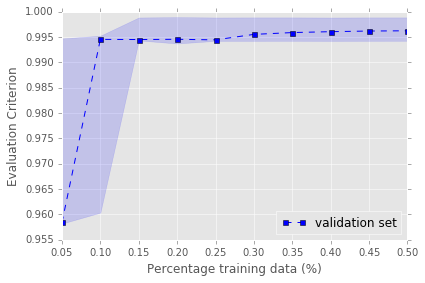

In [10]:
clf = LogisticRegression()

test_scores = []
train_sizes=np.linspace(5e-4,5e-3,10)

for size in train_sizes:
    cv = StratifiedShuffleSplit(n_splits=100,
                                train_size = size,
                                test_size = 1-size,
                               )
    test_scores.append(cross_val_score(estimator=clf,X=X,y=y,cv=cv,scoring=my_scorer))

plot_filled(np.array(test_scores), train_sizes*100, 'Percentage training data (%)')

___
*Enter you answer here (double click)*

It seems that 0.15% of percentage training data are positive examples required to have a good trade off. Based on the graph, 0.1% of training data has high accuracy but the variance is still big. When the number of trainning data increase to 0.15%, the declined shade implies we have relative low variance (precise) and also have low bias (accuracy).
___

___
<a id="stats"></a>
<a href="#top">Back to Top</a>

# Statistical Comparison
Now lets create a few different models and see if any of them have statistically better performances. 

We are creating three different classifiers below to compare to one another. For creating different training and testing splits, we are using stratified shuffle splits on the datasets. 



In [13]:
clf1 = LogisticRegression(C=100)
clf2 = LogisticRegression(C=1)
clf3 = LogisticRegression(C=0.1)

train_size = 0.003 # small training size
cv = StratifiedShuffleSplit(n_splits=10,train_size=train_size,test_size=1-train_size)

evals1 = cross_val_score(estimator=clf1,X=X,y=y,scoring=my_scorer,cv=cv)
evals2 = cross_val_score(estimator=clf2,X=X,y=y,scoring=my_scorer,cv=cv)
evals3 = cross_val_score(estimator=clf3,X=X,y=y,scoring=my_scorer,cv=cv)

**Question 7**: Given the code above, what statistical test is more appropriate for selecting confidence intervals, and **why**? Your options are:
- **A**: approximating the evaluation criterion as a binomial distribution and bounding by the variance (the first option we used in the flipped lecture video)
- **B**: approximating the bounds using the folds of the cross validation to get mean and variance (the second option we used in the flipped lecture video)
- **C**: Either are acceptable statistical tests for obtaining confidence intervals

*Enter you answer here (double click)*

B


*The reason that I think (A or B or C) is correct is because...*


For the first method, we assume the normal distrubution of each error rate and sum up the variances to approximate the variance of difference. Because we doubt the independence (cross validation used) of any pairwise two distributions of the error rate difference, the valid of the first method is not relaible. We use the exact same folds of the dataset, then the t-tests would be inappropriate using binomial distribution.

The second method could be more empirical and solve the problem mentioned above.
___

___
**Final Exercise:** With 95% confidence, perform the statistical test that you selected above. Is any model or set of models statistically the best performer(s)? Or can we not say if the models are different with greater than 95% confidence?

If you chose option A, use a multiplier of Z=1.96. The number of instances used in testing can be calculated from the variable `train_size`.

If you chose option B, use a multiplier of t=2.26 and k=10.

In [24]:
#===================================================
# Enter your code below

def test_for_diff(d):
    t = 2.26/np.sqrt(10)
    stdtot = np.std(d)
    dbar = np.mean(d)
    print('Range of:',dbar-t*stdtot,dbar+t*stdtot)

d1_2 = (1-evals1) - (1-evals2)
d2_3 = (1-evals2) - (1-evals3)
d1_3 = (1-evals1) - (1-evals3)
print('Comparsion of model 1 and model 2')
test_for_diff(d1_2)
print('Comparsion of model 2 and model 3')
test_for_diff(d2_3)
print('Comparsion of model 1 and model 3')
test_for_diff(d1_3)
print('Model 3 has statistically the best f_score with 95% confidence')
# print('As the confidence interval of comparsion invloved model 3 contain the zero and the difference is negative (d = XX-model3)')
#===================================================

Comparsion of model 1 and model 2
Range of: -0.0287777811996 0.0254954399332
Comparsion of model 2 and model 3
Range of: -0.941611801056 -0.904850345249
Comparsion of model 1 and model 3
Range of: -0.95222591768 -0.897518569891
Model 3 has statistically the best f_score with 95% confidence


________________________________________________________________________________________________________

That's all! Please **save (make sure you saved!!!) and upload your rendered notebook** and please include **team member names** in the notebook submission.